In [1]:
from google.colab import files
uploaded = files.upload()

Saving Soyabean_Prices_Aggregated.xlsx to Soyabean_Prices_Aggregated.xlsx


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error, mean_absolute_error
import plotly.express as px

In [3]:
# Load the Soyabean price data
df = pd.read_excel('Soyabean_Prices_Aggregated.xlsx', index_col='Date', parse_dates=True)

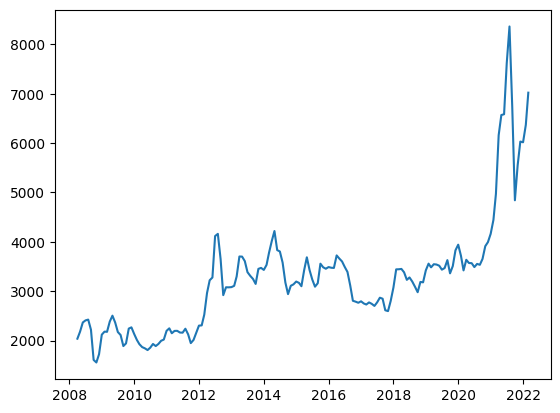

In [4]:
plt.plot(df.index, df['Modal Price_Soyabean'])
plt.show()

In [5]:
# Training Test Split
to_row = int(len(df)*0.8)

In [6]:
to_row = int(len(df)*0.8)
training_data = list(df[0:to_row]['Modal Price_Soyabean'])
testing_data = list(df[to_row:]['Modal Price_Soyabean'])

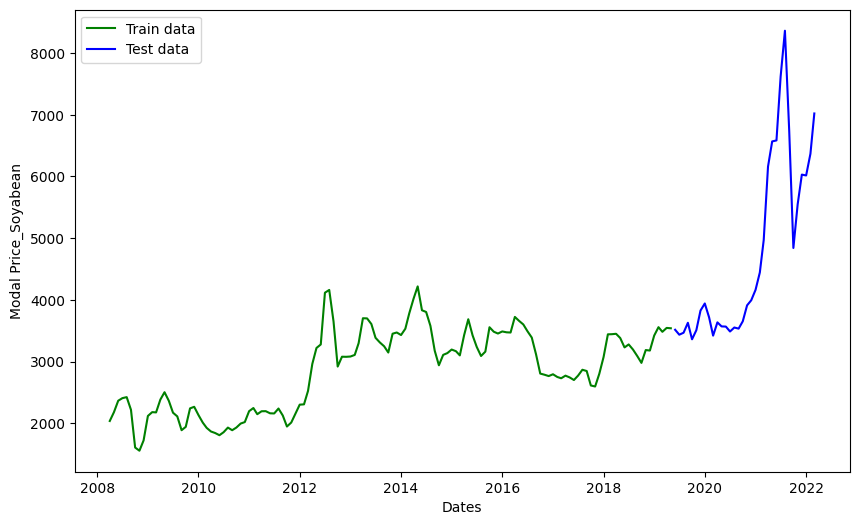

In [7]:
#split data into training and testing set
plt.figure(figsize=(10,6))
plt.grid=(True)
plt.xlabel('Dates')
plt.ylabel('Modal Price_Soyabean')
plt.plot(df[0:to_row]['Modal Price_Soyabean'],'green', label='Train data')
plt.plot(df[to_row:]['Modal Price_Soyabean'],'blue', label='Test data')
plt.legend()

In [8]:
model_predictions = []
n_test_obser = len(testing_data)

In [9]:
for i in range(n_test_obser):
  model = ARIMA(training_data, order = (2,0,0))
  model_fit = model.fit()
  output = model_fit.forecast()
  yhat = list(output)
  model_predictions.append(yhat)
  actual_test_value = testing_data[i]
  training_data.append(actual_test_value)
  #print(output)
  #break

/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'


In [10]:
list(output)

[6354.403632920257]

In [11]:
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  167
Model:                 ARIMA(2, 0, 0)   Log Likelihood               -1190.320
Date:                Sat, 22 Apr 2023   AIC                           2388.641
Time:                        01:52:43   BIC                           2401.113
Sample:                             0   HQIC                          2393.703
                                - 167                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       3216.8634    811.482      3.964      0.000    1626.388    4807.339
ar.L1          1.2688      0.028     44.594      0.000       1.213       1.325
ar.L2         -0.3077      0.026    -11.856      0.0

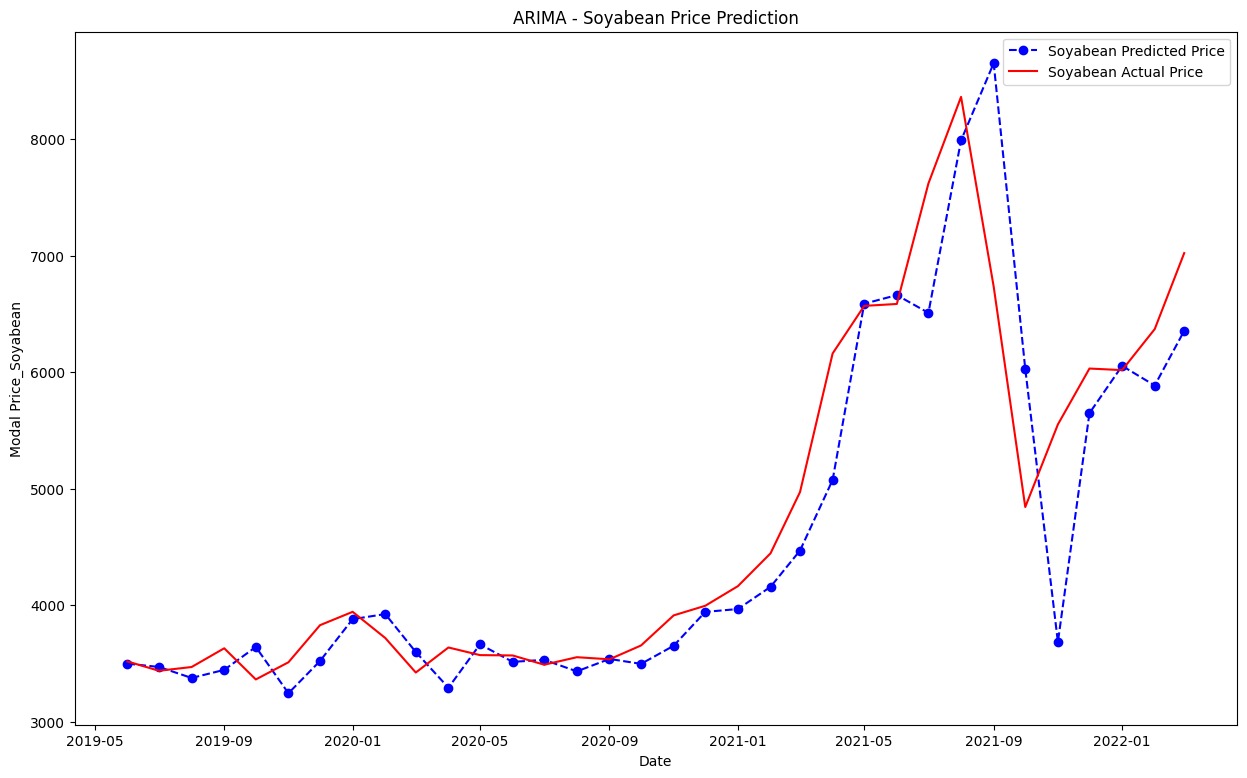

In [15]:
plt.figure(figsize=(15,9))
plt.grid=(True)

date_range = df[to_row:].index

plt.plot(date_range, model_predictions, color = 'blue', marker = 'o', linestyle = 'dashed', label = 'Soyabean Predicted Price')
plt.plot(date_range, testing_data, color = 'red', label = 'Soyabean Actual Price')
plt.title('ARIMA - Soyabean Price Prediction')
plt.xlabel('Date')
plt.ylabel('Modal Price_Soyabean')
plt.legend()
plt.show()

In [13]:
#report performance
mape = np.mean(np.abs(np.array(model_predictions)-np.array(testing_data))/np.abs(testing_data))
print ('MAPE:'+str(mape))

MAPE:0.31468480816120636


In [14]:
MSE = np.square(np.subtract(testing_data,model_predictions)).mean() 
 
RMSE = math.sqrt(MSE)
print("Root Mean Square Error:\n")
print(RMSE)

Root Mean Square Error:

2058.3288644702902
